In [1]:
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# even mijn path uitcommenten ipv verwijderen :)
# df = pd.read_csv(r"C:\Users\Romar\Google Drive\Master\DE\DE-group-5\Assignment 2\Data\data.csv")
heart_data = pd.read_csv(r"C:\Users\Jim\Documents\GitHub\DE-group-5\Assignment 2\Data\heart_failure_clinical_records_dataset.csv")
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- Sex - Gender of patient Male = 1, Female =0
- Age - Age of patient
- Diabetes - 0 = No, 1 = Yes
- Anaemia - 0 = No, 1 = Yes
- High_blood_pressure - 0 = No, 1 = Yes
- Smoking - 0 = No, 1 = Yes
- DEATH_EVENT - 0 = No, 1 = Yes

In [4]:
Features = ['time','ejection_fraction','serum_creatinine']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [5]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
print(kn_acc * 100)

91.66666666666666


<Figure size 432x288 with 0 Axes>

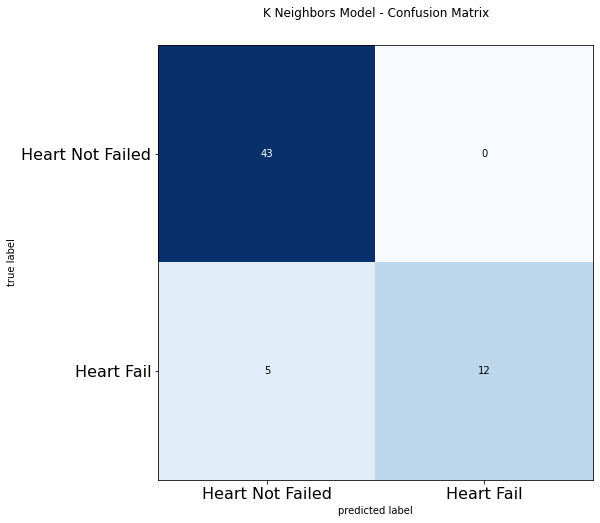

In [6]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [3]:
def PreprocessData(df):
    #Remove all NaN rows
    df_preprocessed = df.dropna()
    
    #one hot encoding nationality
    encoder = TargetEncoder()
    df_preprocessed['Nationality Encoded'] = encoder.fit_transform(df_preprocessed['Nationality'], df_preprocessed['Overall'])
    df_preprocessed.pop('Nationality')


    #one hot encoding club (remove NaN first)
    encoder = TargetEncoder()
    df_preprocessed['Club Encoded'] = encoder.fit_transform(df_preprocessed['Club'], df_preprocessed['Overall'])
    df_preprocessed.pop('Club')

    #onehot encoding preferred foot (remove NaN first)\
    encoder = TargetEncoder()
    df_preprocessed['Preferred Foot Encoded'] = encoder.fit_transform(df_preprocessed['Preferred Foot'], df_preprocessed['Overall'])
    df_preprocessed.pop('Preferred Foot')

    #encode Workrate
    encoder = TargetEncoder()
    df_preprocessed['Work Rate Encoded'] = encoder.fit_transform(df_preprocessed['Work Rate'], df_preprocessed['Overall'])
    df_preprocessed.pop('Work Rate')
    
    #encode BodyType
    encoder = TargetEncoder()
    df_preprocessed['Body Type Encoded'] = encoder.fit_transform(df_preprocessed['Body Type'], df_preprocessed['Overall'])
    df_preprocessed.pop('Body Type')

    #encode position
    encoder = TargetEncoder()
    df_preprocessed['Position Encoded'] = encoder.fit_transform(df_preprocessed['Position'], df_preprocessed['Overall'])
    df_preprocessed.pop('Position')


    #Value
    value = df_preprocessed.Value
    newvalue = []
    for ITEM in value:
        temp = ITEM.split("€")[1]
        if ITEM[-1] == 'K':
            newvalue.append(float(temp.split("K")[0]))
        elif ITEM[-1] == 'M':
            newvalue.append(float(temp.split("M")[0]))
        else:
            newvalue.append(float(temp))
    df_preprocessed['Value'] = newvalue
    newvalue = []

    #Wage
    wage = df_preprocessed.Wage
    newwage = []
    for ITEM in wage:
        temp = ITEM.split("€")[1]
        newwage.append(float(temp.split("K")[0]))
    df_preprocessed['Wage'] = newwage
    newwage = []
    
    #Weight
    weight = df_preprocessed.Weight
    newweight = []
    for ITEM  in weight:
        newweight.append(float(ITEM.split("lbs")[0]))
    df_preprocessed['Weight'] = newweight
    newweight = []

    #Height
    newheight = []
    height = df_preprocessed.Height
    for ITEM in height:
        feet, inch = float(ITEM.split("'")[0]), float(ITEM.split("'")[1])
        newheight.append(feet*30.48 + inch*2.54)
    df_preprocessed['Height'] = newheight
    newheight = []


    #All the positions, weet niet wat we daar mee willlen
    positions = ['LS','ST' , 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM', 'RM','LWB',
                 'LDM','CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB','RB']

    for position in positions:
        data = []
        new_data = []
        data = df_preprocessed[position]
        for ITEM in data:
            new_data.append(float(ITEM.split("+")[0]) + float(ITEM.split("+")[1]))
        df_preprocessed[position] = new_data
        new_data = []

    return df_preprocessed


def SplitData(df):
    #remove irrelevant columns
    df.pop('ID')
    df.pop('Unnamed: 0')
    df.pop('Photo')
    df.pop('Flag')
    df.pop('Club Logo')
    df.pop('Release Clause')
    df.pop('Name')
    df.pop('Loaned From')
    df.pop('Real Face')
    df.pop('Contract Valid Until')
    df.pop('Joined')

    #preprocess the dataframe
    df_pp = PreprocessData(df)

    #Create a train and test split
    y = df_pp.pop('Overall')
    X_train, X_test, y_train, y_test = train_test_split(df_pp, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = SplitData(df)

In [4]:
x = X_train.columns
for item in x:
    print(item)
    print(X_train[(item)].dtype)


Age
int64
Potential
int64
Value
float64
Wage
float64
Special
int64
International Reputation
float64
Weak Foot
float64
Skill Moves
float64
Jersey Number
float64
Height
float64
Weight
float64
LS
float64
ST
float64
RS
float64
LW
float64
LF
object
CF
float64
RF
float64
RW
float64
LAM
float64
CAM
float64
RAM
float64
LM
float64
LCM
float64
CM
float64
RCM
float64
RM
float64
LWB
float64
LDM
float64
CDM
float64
RDM
float64
RWB
float64
LB
float64
LCB
float64
CB
float64
RCB
float64
RB
float64
Crossing
float64
Finishing
float64
HeadingAccuracy
float64
ShortPassing
float64
Volleys
float64
Dribbling
float64
Curve
float64
FKAccuracy
float64
LongPassing
float64
BallControl
float64
Acceleration
float64
SprintSpeed
float64
Agility
float64
Reactions
float64
Balance
float64
ShotPower
float64
Jumping
float64
Stamina
float64
Strength
float64
LongShots
float64
Aggression
float64
Interceptions
float64
Positioning
float64
Vision
float64
Penalties
float64
Composure
float64
Marking
float64
StandingTackle
float64